<a href="https://colab.research.google.com/github/buzzaggwd/ML/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Анализ целевой переменной Y с точки зрения статистики

In [3]:
!pip install pandas scikit-learn seaborn scipy

In [4]:
   # Импорт библиотек
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

In [5]:
# Загрузка набора данных сразу в датафрейм
df = pd.read_csv('/content/heart_disease.csv')

In [6]:
df # Датафрейм посмотрели

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [7]:
# Распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: sex
колонка: chest pain type
колонка: resting blood pressure
колонка: serum cholestoral in mg/dl      
колонка: fasting blood sugar > 120 mg/dl 
колонка: resting electrocardiographic results
колонка: maximum heart rate achieved  
колонка: exercise induced angina    
колонка: oldpeak 
колонка: slope of peak
колонка: number of major vessels 
колонка: thal
колонка: Disease


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral in mg/dl            270 non-null    int64  
 5   fasting blood sugar > 120 mg/dl       270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   maximum heart rate achieved           270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    int64  
 11  number of major ves

In [9]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # Пропусков нет👍

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


In [10]:
# Генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'age'] = np.nan

In [11]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # Пропуски появились

age                                     5
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


In [12]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # Пропусков нет


# Удаление строк с пропусками
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


In [13]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.age = df_median.age.fillna(df_median.age.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # Пропусков нет


# Заполнение пропусков медианой
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


In [14]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.age = df_mean.age.fillna(df_median.age.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # Пропусков нет


# Заполнение пропусков средним
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


### Выбираем целевую переменную
В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное.

Я выбрала целевую переменную old_people -> которая была преобразована из age (если возраст больше 65, то человек считается стареньким (чут-чут🤏), иначе молодой)

In [15]:
df['old_people'] = np.where(df['age'] >= 65, 1, 0).astype(int)

In [16]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl      ', 'fasting blood sugar > 120 mg/dl ',
       'resting electrocardiographic results', 'maximum heart rate achieved  ',
       'exercise induced angina    ', 'oldpeak ', 'slope of peak',
       'number of major vessels ', 'thal', 'Disease', 'old_people'],
      dtype='object')

In [17]:
Y = df['old_people'] # Выбираем целевую переменную (категориальную)
X = df.drop('old_people', axis=1) # Переменные для проверки влияния

# Дропаем базовую переменную, а не только Y
X = X.drop('age', axis=1)

 Графический анализ

In [20]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,1,4,140,192,0,0,148,0,0.4,2,0,6,0


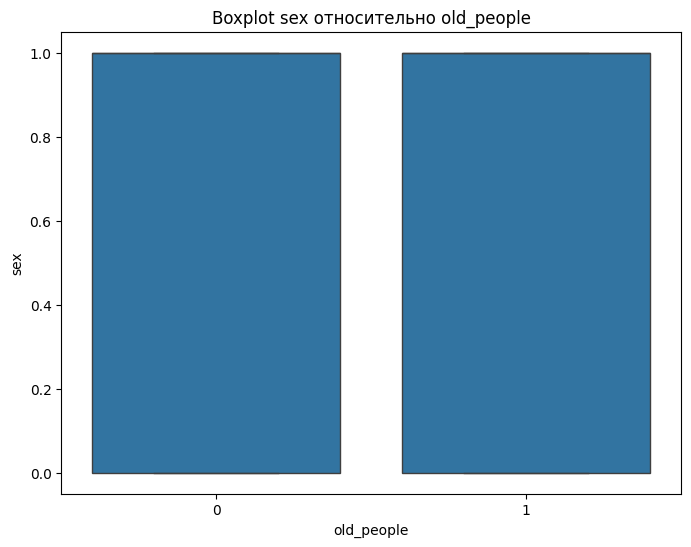

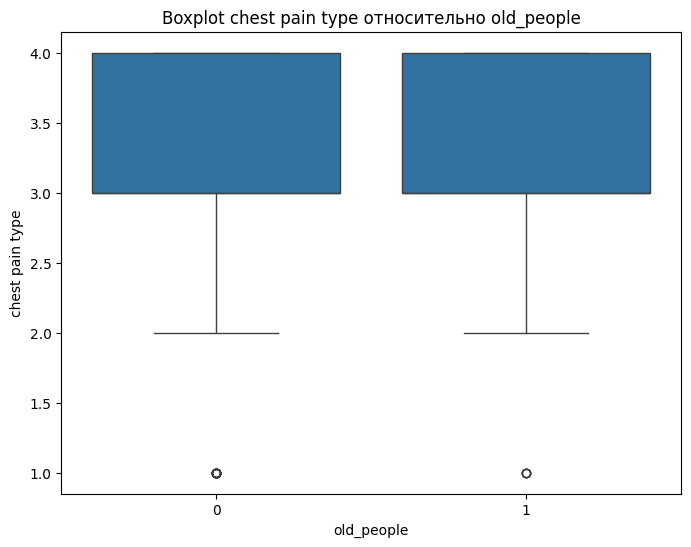

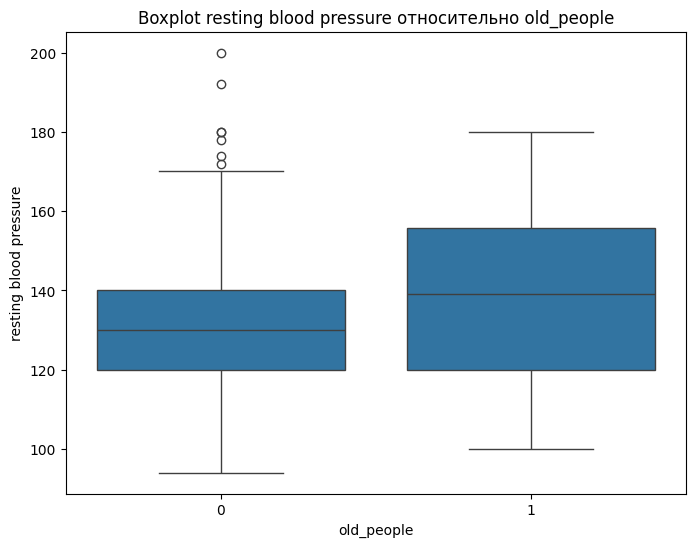

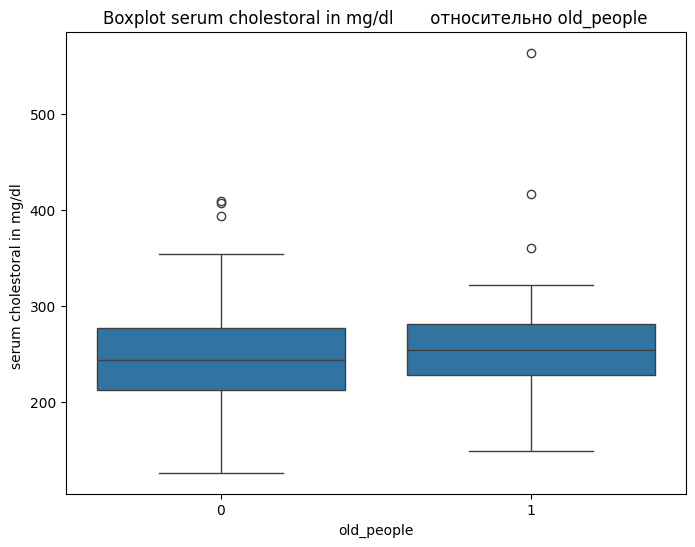

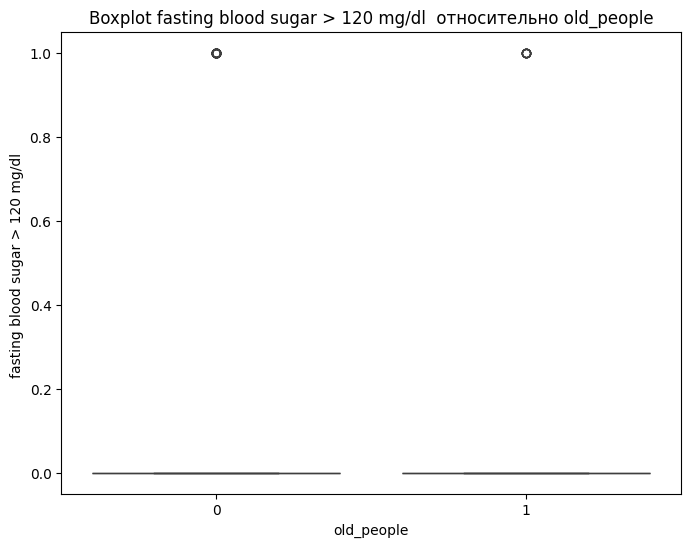

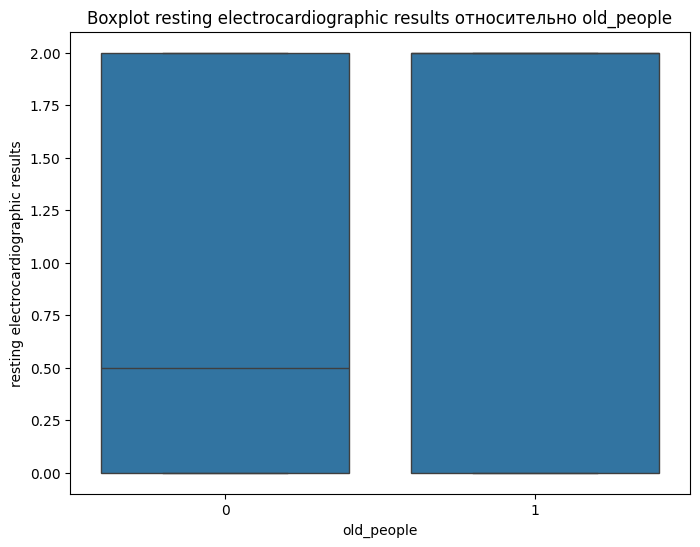

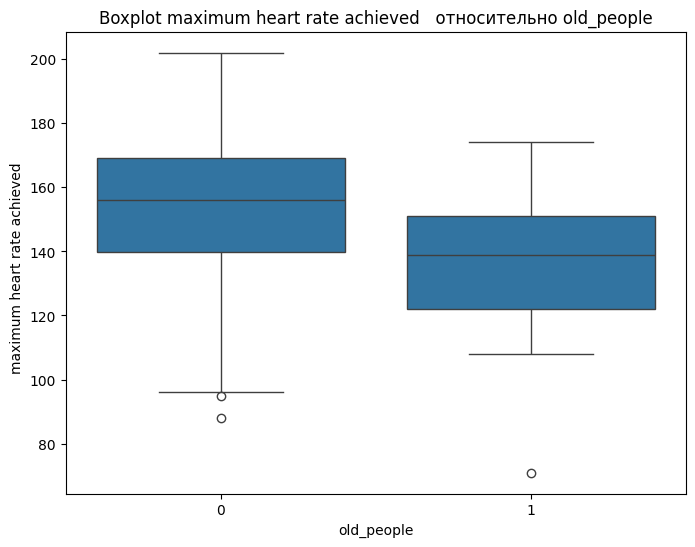

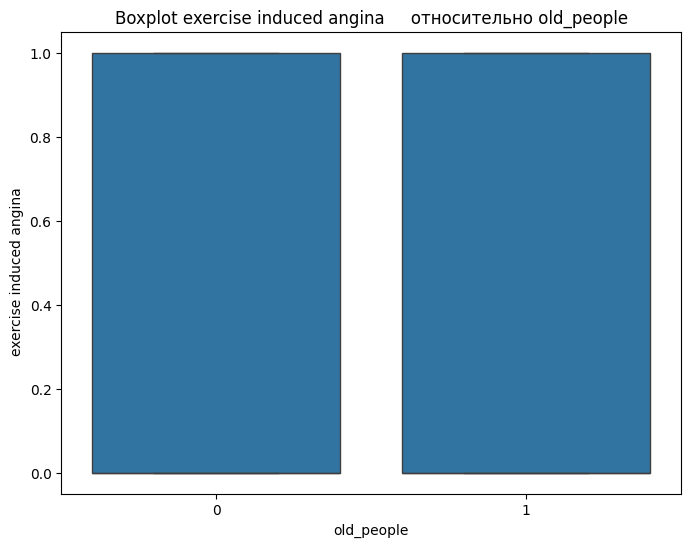

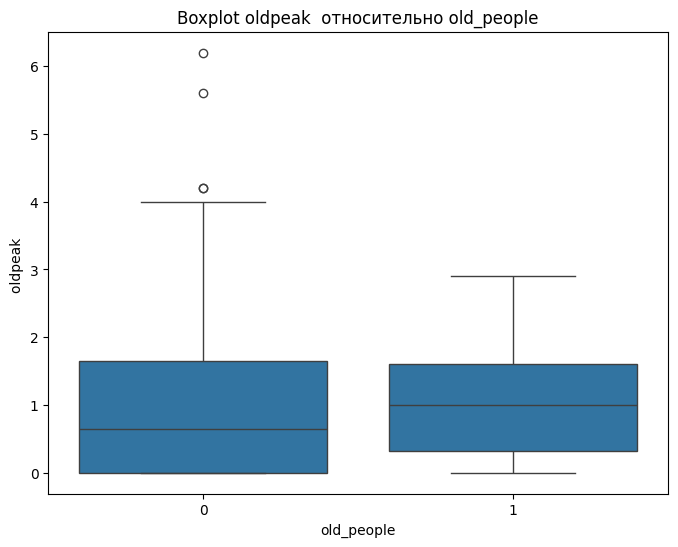

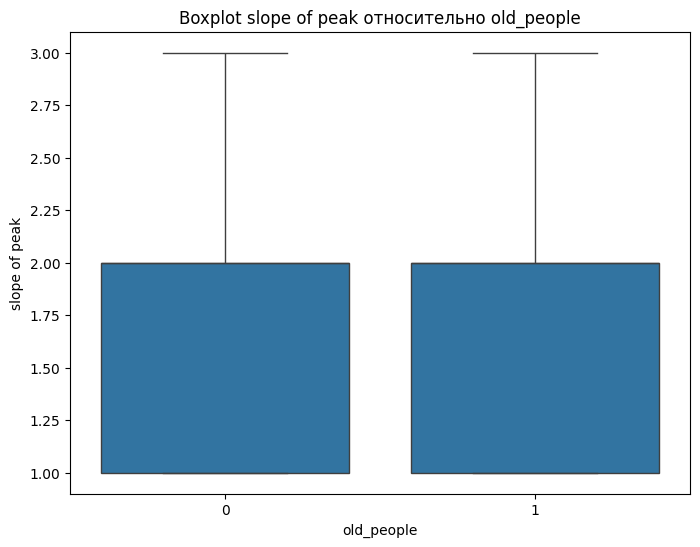

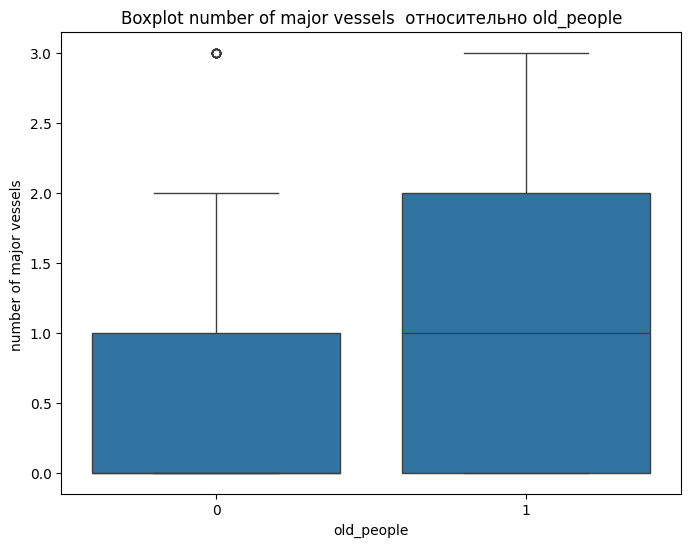

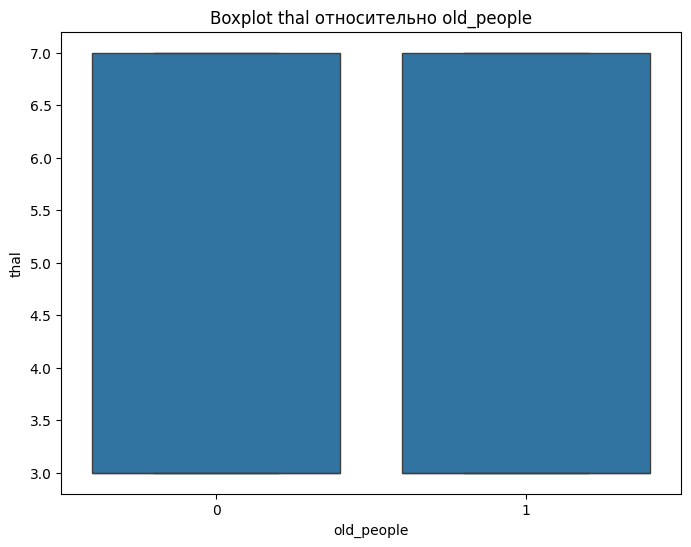

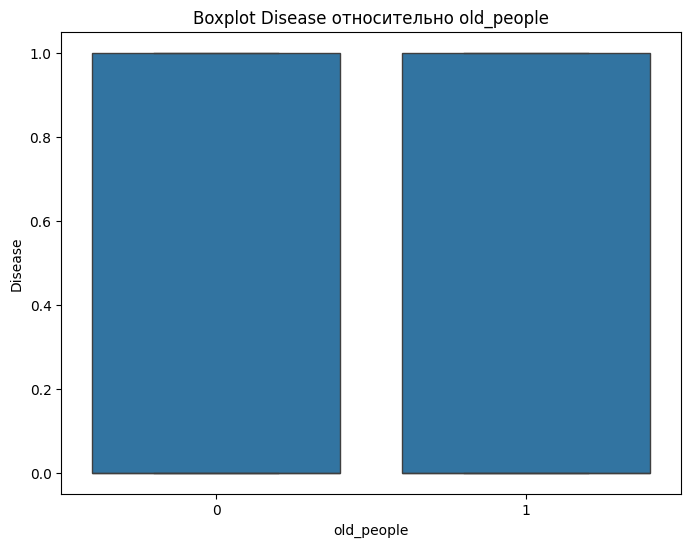

In [21]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='old_people', y=col, data=df)
    plt.title(f'Boxplot {col} относительно old_people')
    plt.show()

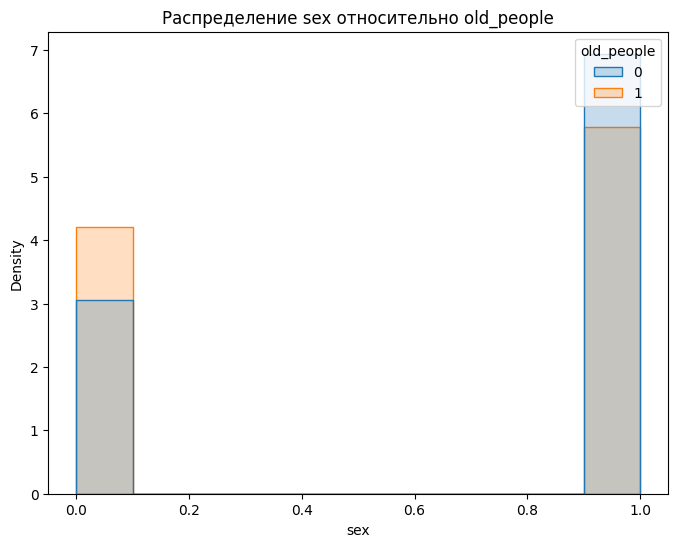

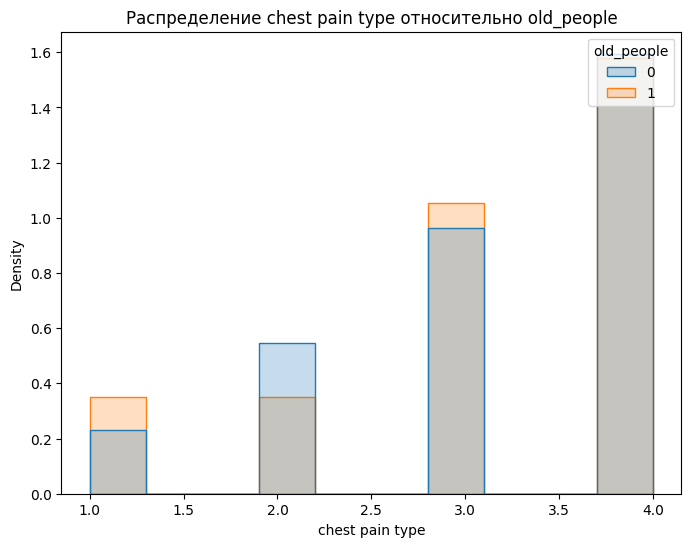

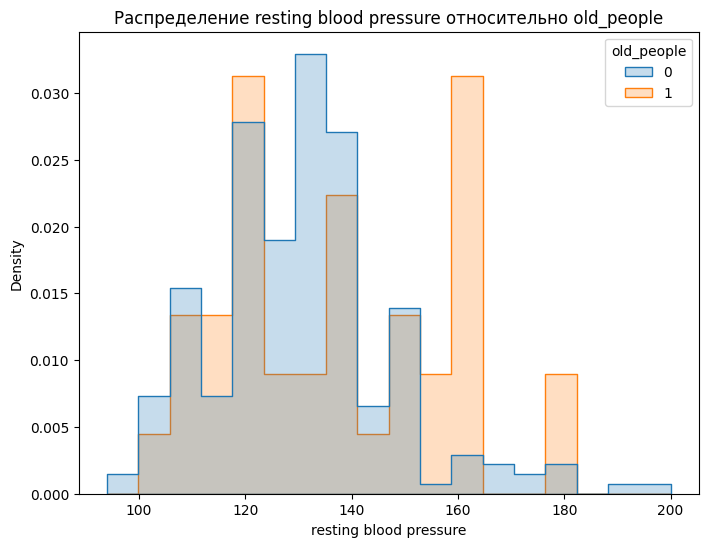

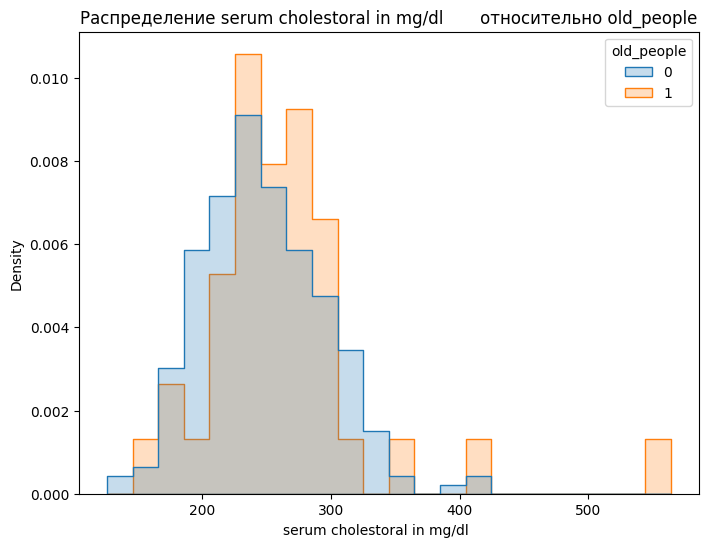

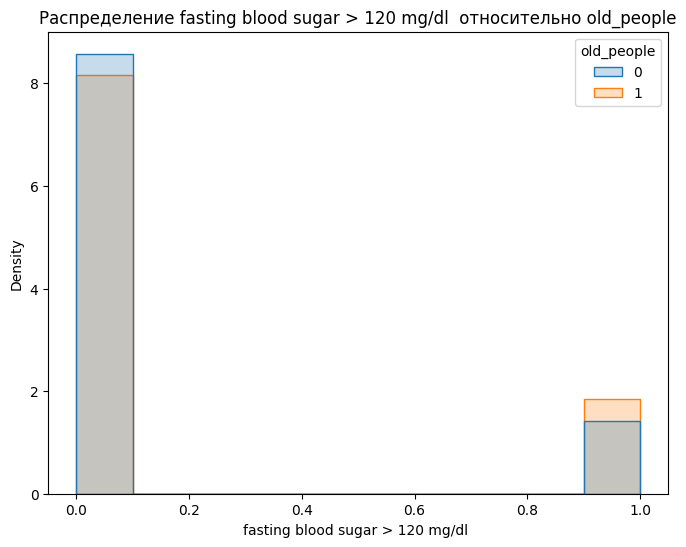

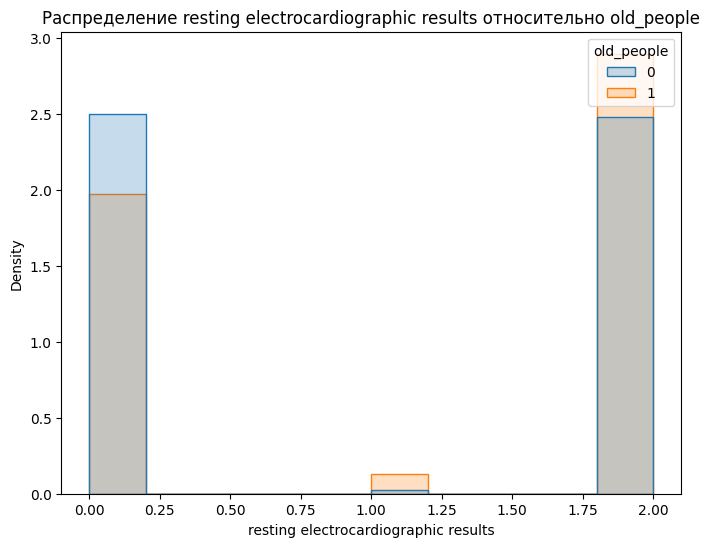

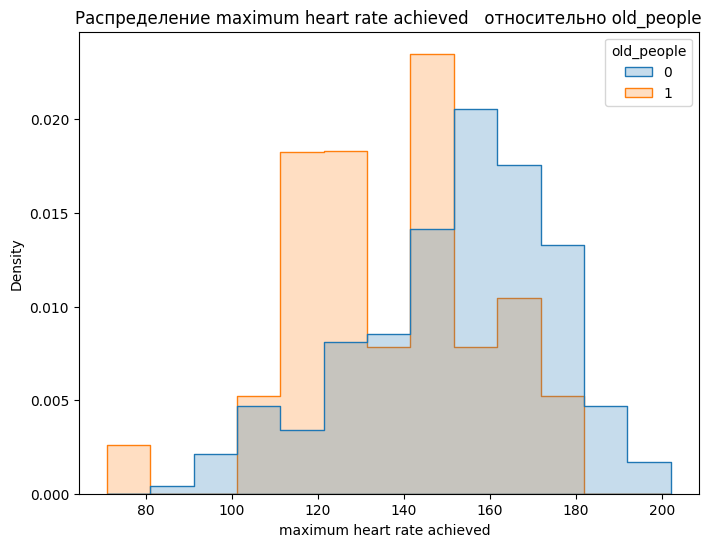

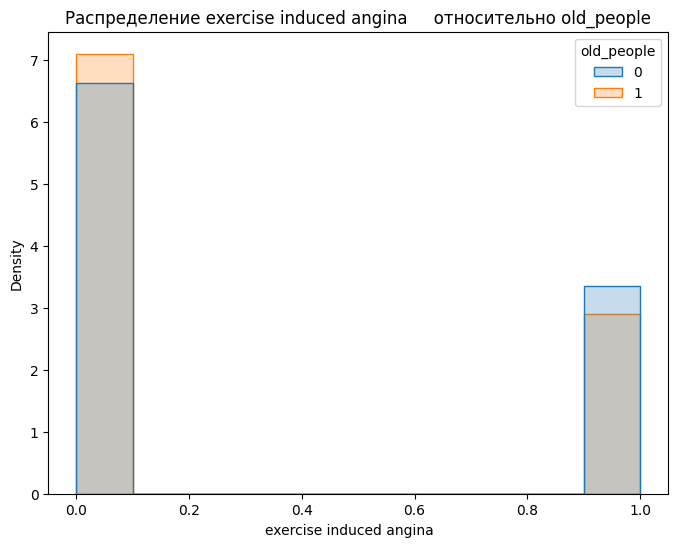

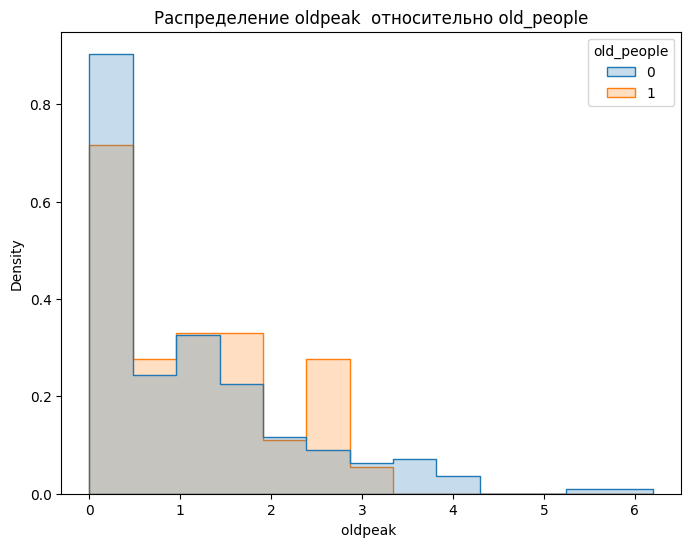

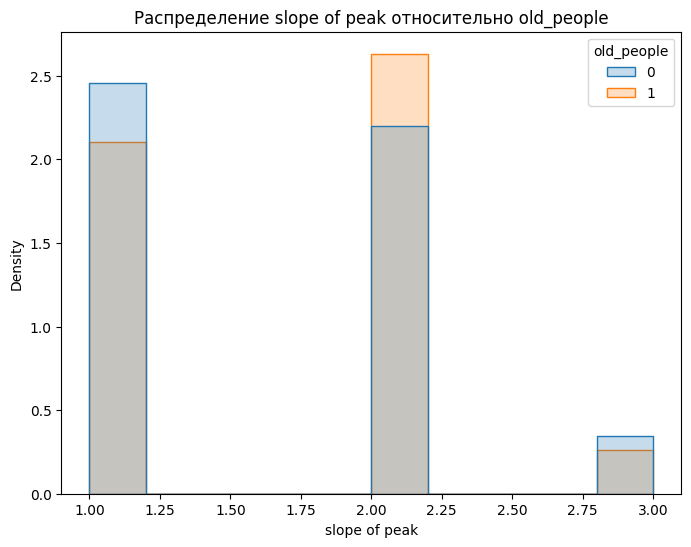

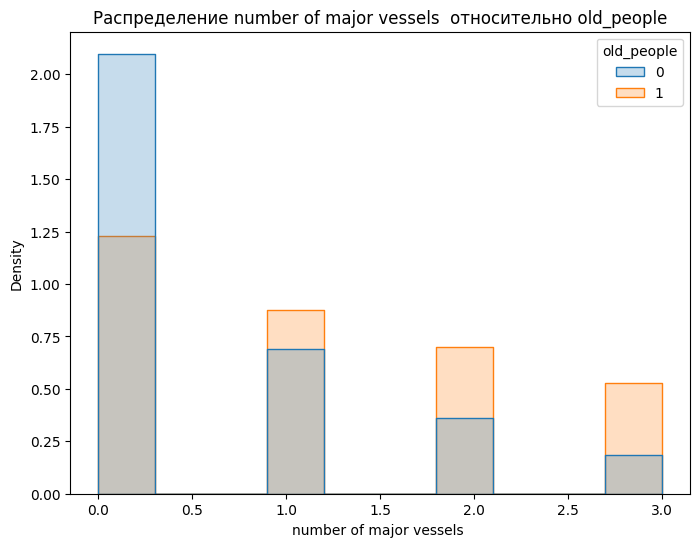

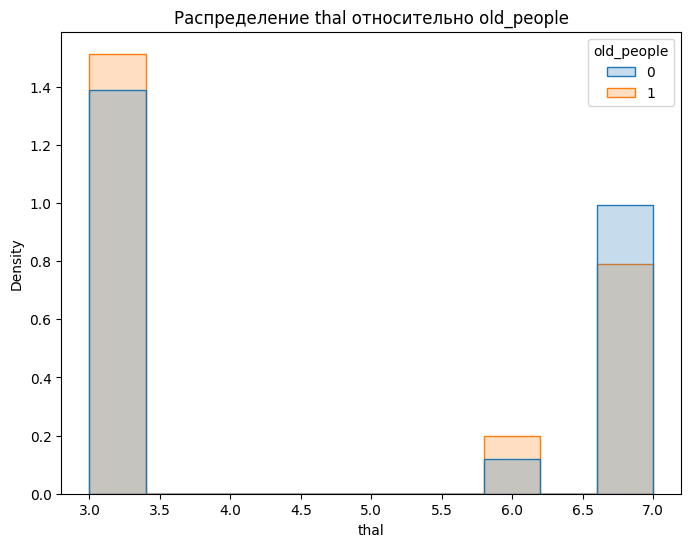

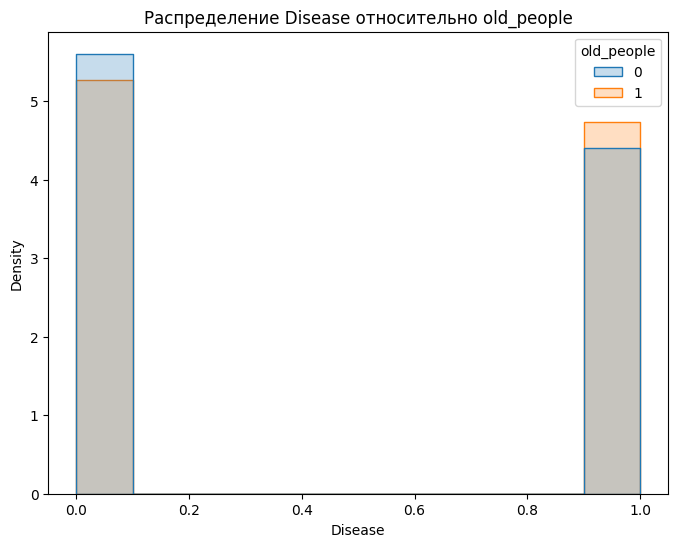

In [22]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='old_people', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно old_people')
    plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral in mg/dl            270 non-null    int64  
 5   fasting blood sugar > 120 mg/dl       270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   maximum heart rate achieved           270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    int64  
 11  number of major ves

In [24]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('old_people')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('old_people')[df.select_dtypes(include=['int64']).columns].describe()

### Описание полученных результатов

In [25]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('old_people')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для sex:

            count      mean       std  min  25%  50%  75%  max
old_people                                                    
0           232.0  0.693966  0.461841  0.0  0.0  1.0  1.0  1.0
1            38.0  0.578947  0.500355  0.0  0.0  1.0  1.0  1.0


Описательная статистика для chest pain type:

            count      mean       std  min  25%  50%  75%  max
old_people                                                    
0           232.0  3.176724  0.943775  1.0  3.0  3.0  4.0  4.0
1            38.0  3.157895  1.000711  1.0  3.0  3.0  4.0  4.0


Описательная статистика для resting blood pressure:

            count        mean        std    min    25%    50%     75%    max
old_people                                                                  
0           232.0  130.435345  17.147063   94.0  120.0  130.0  140.00  200.0
1            38.0  136.894737  21.142745  100.0  120.0  139.0  155.75  180.0


Описательная статистика для serum cholestoral in 

In [26]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


age                                                        sex  \
            count       mean       std   min   25%   50%    75%   max  count   
old_people                                                                     
0           232.0  52.215517  7.751895  29.0  46.0  53.5  58.25  64.0  232.0   
1            38.0  67.973684  2.990859  65.0  66.0  67.0  69.75  77.0   38.0   

                      ... Disease      old_people                           \
                mean  ...     75%  max      count mean  std  min  25%  50%   
old_people            ...                                                    
0           0.693966  ...     1.0  1.0      232.0  0.0  0.0  0.0  0.0  0.0   
1           0.578947  ...     1.0  1.0       38.0  1.0  0.0  1.0  1.0  1.0   

                      
            75%  max  
old_people            
0           0.0  0.0  
1           1.0  1.0  

[2 rows x 112 columns]

1. Sex:
*   Среднее значение у людей пола 0 по возрасту составляет 0.694, что чуть больше,чем у людей пола 1, где среднее значение 0,579.
*   Разброс практически одинаковый, это значит, что старших людей есть и в мужчинах, и в женщинах.
*   Минимальные и максимальные значения полностью совпадают, что... супер👍

2. chest pain type
*   Средние значения и вариативность по болям в груди для пожилых и для молодых практически одинаковые (3.177 и 3.158, 0.944 и 1.001 соответственно), что говорит об одиинаковой распростаненности типов болей в груди у обеих возрастных групп.

3. resting blood pressure
*   У пожилых в среднем кровяное давление выше (136.895), чем у молодых (130.435).
*   Разброс значений также довольно сильно разнится - 17.147 у молодежи и 21.143 у пожилых.
*   Что интересно, у молодых минимальное знаение составляет 94.0, максимальное 200.0, а у стариков минимальное 100.0, максимальное 180.0. Нам это говорит о том, что (по идее) разброс значений у молодых должен быть больше, чем у пожилых, а по факту наоборот... Я запуталась, я хочу спать(. А, не, все норм! Молодых просто впринципе больше в выборке, так что все в подрядке. Наверное.

4. serum cholestoral in mg/dl
*   Так, ладно. В среднем, холестерола больше у людей пожилого возраста (263.895), чем у молодых (247.328).
*   Вариативность также на стороне стариков (70.496 против 47.709)
*   У молодой команды минимальное значение 126.0, максимальное 409.0, а у команды старичков 149.0 и 564.0.

5. fasting blood sugar > 120 mg/dl
*   Здесь не очень интересно, почти все значения одинаковые. Разница в сотых частях, но лидируют в них пожилые. Видимо у них чут-чут🤏 больше сахара в крови.

6. resting electrocardiographic results
* Так, окей, результаты кардиограммы выше (хуже я так думаю) у пожилых. Среднее значение пожилых 1.184 против среднего молодых 0.996.

7. maximum heart rate achieved
*   Опа. Средний пульс у молодых 151.746, а у пожилых (внимание) 137.053.
*   Едем дальше, вариативность различается не особо, но...
*   Минимальные и максимальные частота пульса у молодых (88.0 на 202.0) и у пожилых (71.0 на 174.0) довольно сильно разнятся. Здесь мы можем четко проследить, что сердце у пожилых работает хуже, чем у команды молодежи. 1 очко молодым!

8. exercise induced angina
*   Тут какой-то прикол непонятный. В целом, разницы между значениями почти нет. Единственное, что среднее у пожилых на ~~0.02 меньше.

9. oldpeak
*   О, мое любимое, олдпик. Среднее у стариков чуть выше (1.113), чем у молодых (1.04).
*   Вариативность наоборот выше у молодых (1.18) против (0.913).
*   Минимальное у обеих групп 0.0 (отсутствие предрасположенности к болезни), а максимальное у молодых 6.2, а у пожилых 2.9. Похоже, что болезнь, на которую показывает олдпик, больше распространена среди молодых. Забираем у них очко!

10. slope of peak
*   Тут скучновато, практически нет разницы ни в одном из показателей. Чуть-чуть среднее больше у пожилых и чуть-чуть больше вариативность у молодых.

11. number of major vessels
*   Вот это круто, вот это да. Среднее у молодых 0.59, а у стариков 1.158! Больше сосудов у пожилых?
*   В номенации вариативность первое место занимает команда... Пожилых! У них 1.103 против каких-то жалких 0.892 у молодежи.
*   Минимальные и максимальные значения совпадают, зато на 50% и 75% лидируют снова старички, молодцы.

12. thal
*   Сааамую малость среднее среди молодежи по талессимии выше, чем у пожилых (4.728 против 4.5).
*   Вариативность тоже чуть больше у молодежи (на 0.05)

13. Disease
*   ААА последнее боже мой. Ну, тут практически одинаковые значения везде, разве что совсем чуть-чуть у пожилых показатели выше (прям совсем чуть-чуть).

### Вывод:
На основе всех имеющихся данных можно сделать выводы о ключевых характеристиках, по которым можно определить биологический возраст человека. А именно:
*   Кровяное давление у людей преклонного возраста зачастую ниже, чем у более молодых.
*   Количество холестерола в крови у пожилых выше, чем у молодых людей.
*   Пульс у более пожилых людей заметно реже.
*   Показатель олдпик зачастую выше среди молодежи.
*   Колчество сосудов значительно больше у старичков (почему-то, ну ладно)


Это было тяжело



# Расчет теста Пирсона

Рассчитаем коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

1. Рассчитаем коэффициенты корреляции Пирсона для каждого признака:

In [27]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,old_people
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322,0.602712
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721,-0.085589
chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436,-0.006905
resting blood pressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383,0.125994
serum cholestoral in mg/dl,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021,0.111674
fasting blood sugar > 120 mg/dl,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319,0.041084
resting electrocardiographic results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091,0.065819
maximum heart rate achieved,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514,-0.220976
exercise induced angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303,-0.034572
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967,0.022361


1. number of major vessels и age (0.356):
Есть умеренная положительная корреляция между количеством сосудов и возрастом. Это указывает на то, что с возрастом, похоже, у человека появляется больше сосудов.

2. Disease и chest pain type (0.417):
Похожая корреляция есть между наличием болезни и типов боли в груди. Логично, если болит, значит есть болезнь.

3. slope of peak и oldpeak (0.61):
Ну вот ей богу, это очень сложно. Слоуп оф пик это особый показатель на результате ЭКГ (в первой практике писала об этом), а олдпик, это риск развития заболеваний, и они супер сильно связаны.

4. exercise induced angina и Disease (0.419):
Стенокардия вызывает болезнь.. Или это показатель болезни.. Ну, корреляция есть и она видна явно.

5. Disease и thal (0.525):
Да, все супер, если есть талассемия, то и есть болезнь, потому что талассемия это болезнь.

6. maximum heart rate achieved и Disease (-0.419):
Эта корреляция может говорить о том, что чем ниже (?) пульс, тем чаще встречается болезнь.

## Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. Переоценка значимости признаков:
Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. Нестабильность модели:
При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. Затруднение выбора значимых признаков:
Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. Увеличение дисперсии коэффициентов:
Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

# Немного машинного обучения
* отберем признаки (числовые и
категориальные отдельно)
* обработаем числовые и категориальыне
* обучим модель
* узнаем что влияет на Y

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: []


In [30]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [31]:
X_processed

,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [32]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['oldpeak ']


In [33]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [34]:
X_processed

,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,1,4,130,322,0,2,109,0,0.387097,2,3,3,1
1,0,3,115,564,0,2,160,0,0.258065,2,0,7,0
2,1,2,124,261,0,0,141,0,0.048387,1,0,7,1
3,1,4,128,263,0,0,105,1,0.032258,2,1,7,0
4,0,2,120,269,0,2,121,1,0.032258,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,3,172,199,1,0,162,0,0.080645,1,0,7,0
266,1,2,120,263,0,0,173,0,0.000000,1,0,7,0
267,0,2,140,294,0,2,153,0,0.209677,2,0,3,0
268,1,4,140,192,0,0,148,0,0.064516,2,0,6,0


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу. Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

Функция для обучения и оценки модели

In [35]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [36]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8796
Точность на тестовой выборке: 0.8333

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.33      0.12      0.18         8

    accuracy                           0.83        54
   macro avg       0.60      0.54      0.54        54
weighted avg       0.78      0.83      0.80        54




Пояснение:

* Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
* Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
* Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
* F1-score: Гармоническое среднее между точностью и полнотой.

In [37]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                                 Feature  Coefficient
7            exercise induced angina        -1.160831
10              number of major vessels      0.765600
12                               Disease    -0.674994
8                               oldpeak     -0.523362
11                                  thal    -0.121341
9                          slope of peak     0.120586
4       fasting blood sugar > 120 mg/dl      0.113700
0                                    sex     0.056475
6          maximum heart rate achieved      -0.036998
5   resting electrocardiographic results     0.028001
2                 resting blood pressure     0.024994
1                        chest pain type     0.010332
3       serum cholestoral in mg/dl           0.004958


Пояснение:

* Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
* Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
* Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

Кросс-валидация модели

In [38]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8519
Отклонение точности: 0.0262


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

Построение ROC-кривой

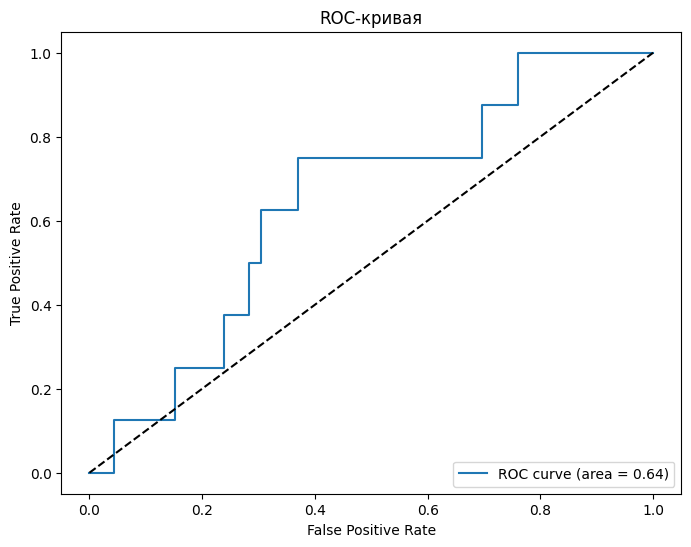

In [40]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## Заключение
Мы успешно построили модель логистической регрессии для предсказания биологического возраста на основе характеристик человесечкого сердца и крови.